# 5 Modeling<a id='5_Modeling'></a>


## 5.1 Contents<a id='5.1_Contents'></a>
* [5 Modeling](#5_Modeling)
  * [5.1 Contents](#5.1_Contents)
  * [5.2 Introduction](#5.2_Introduction)
  * [5.3 Imports](#5.3_Imports)
  * [5.4 Load Data](#5.4_Load_Data)
  * [5.5 Defining Target and feature columns](#5.5_Defining_Target_and_feature_columns)
  * [5.6 Train Test Split](#5.6_Train_Test_Split)
  * [5.7 Resampling Training Data](#5.7_Resampling_Training_Data)
      * [5.7.1 Resampling Using Over Sampling](#5.7.1_Resampling_Using_Over_Sampling)
      * [5.7.2 Resampling Using SMOTE](#5.7.2_Resampling_Using_SMOTE)
      * [5.7.3 Resampling Using ADASYN](#5.7.3_Resampling_Using_ADASYN)
      * [5.7.4 Resampling Using Under Sampling KNN](#5.7.4_Resampling_Using_Under_Sampling_KNN)
      * [5.7.5 Resampling Using Under Random Sampler](#5.7.5_Resampling_Using_Under_Random_Sampler)
  * [5.8 Function to print model accuracy](#5.8_Function_to_print_model_accuracy)
  * [5.9 Logistic Regression](#5.9_Logistic_Regression)
      * [5.9.1 Logistic Regression Using Over Sampling](#5.9.1_Logistic_Regression_Using_Over_Sampling)
      * [5.9.2 Logistic Regression Using SMOTE](#5.9.2_Logistic_Regression_Using_SMOTE)
      * [5.9.3 Logistic Regression Using ADASYN](#5.9.3_Logistic_Regression_Using_ADASYN)
      * [5.9.4 Logistic Regression Using Under Sampling KNN](#5.9.4_Logistic_Regression_Using_Under_Sampling_KNN)
      * [5.9.5 Logistic Regression Using Under Random Sampler](#5.9.5_Logistic_Regression_Using_Under_Random_Sampler)
    * [5.10 XGBoost](#5.9_XGBoost)
      * [5.10.1 XGBoost Using Over Sampling](#5.10.1_XGBoost_Using_Over_Sampling)
      * [5.10.2 XGBoost Using SMOTE](#5.10.2_XGBoost_Using_SMOTE)
      * [5.10.3 XGBoost Using ADASYN](#5.10.3_XGBoost_Using_ADASYN)
      * [5.10.4 XGBoost Using Under Sampling KNN](#5.10.4_XGBoost_Using_Under_Sampling_KNN)
      * [5.10.5 XGBoost Using Under Random Sampler](#5.10.5_XGBoost_Using_Under_Random_Sampler)
   * [5.11 Save Model](#5.11_Save_Model)
   * [5.12 Summary](#5.12_Summary)
      
      
      
      

## 5.2 Introduction<a id='5.2_Introduction'></a>


In this notebook, I will resample data and apply classification models. In the previos notebook, I have noticed using classification models without resampling are giving very low recall score. Because dataset which I am using is imbalanced dataset, it needs to resampled before fiting it to machine learning model. 

## 5.3 Imports<a id='5.3_Imports'></a>

In [444]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_classification 
from imblearn.over_sampling import RandomOverSampler 
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.under_sampling import EditedNearestNeighbours 
import xgboost as xgb
from library.sb_utils import save_file

#import lightgbm as lgb
#from lightgbm import LGBMClassifier


## 5.4 Load Data<a id='5.4_Load_Data'></a>

In [414]:
# the supplied CSV data file is the data directory
hr_data_dummies = pd.read_csv('../data/hr_data_dummies.csv')
hr_data_dummies.head()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes,JobSatisfaction_perc,JobSatisfaction_bool
0,0,41,1102,1,2,1,1,2,94,3,...,1,0,0,0,1,1,0,1,100.0,1
1,1,49,279,8,1,1,2,3,61,2,...,0,0,0,1,0,1,1,0,50.0,0
2,2,37,1373,2,2,1,4,4,92,2,...,0,0,0,0,1,1,0,1,75.0,1
3,3,33,1392,3,4,1,5,4,56,3,...,0,0,0,1,0,1,0,1,75.0,1
4,4,27,591,2,1,1,7,1,40,3,...,0,0,0,1,0,1,1,0,50.0,0


## 5.5 Defining Target and feature columns <a id='5.5_Defining_Target_and_feature_columns'></a>

In [415]:
X = hr_data_dummies.drop(columns=['JobSatisfaction_bool', 'JobSatisfaction_perc', 'JobSatisfaction'])
y = hr_data_dummies.JobSatisfaction_bool

In [416]:
y.value_counts()

1    901
0    569
Name: JobSatisfaction_bool, dtype: int64

In the dataset, target values 1 are 61% and 0 are 39%. It is a imbalanced dataset. There is possibility that output is biased to the class which has a higher number of values. To avoid this I will resample train dataset using imbalanced-learn, which helps balancing the datasets which are highly skewed or biased towards some classes.  

## 5.6 Train Test Split <a id='5.6_Train_Test_Split'></a>


In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47, stratify = y)

Train test split using stratification to make sure percentage of 0 and 1 are same in both train and test datasets.

In [418]:
X_train.shape, X_test.shape

((1176, 57), (294, 57))

In [419]:
y_train.shape, y_test.shape

((1176,), (294,))

## 5.7 Resampling Training Data <a id='5.7_Resampling_Training_Data'></a>


Using different resampling methods to see which can give better results in model.

### 5.7.1 Resampling Using Over Sampling <a id='5.7.1_Resampling_Using_Over_Sampling'></a>


In [420]:
oversample = RandomOverSampler(sampling_strategy='minority') 
X_over, y_over = oversample.fit_resample(X_train, y_train) 


### 5.7.2 Resampling Using SMOTE <a id='5.7.2_Resampling_Using_SMOTE'></a>


In [421]:
smote = SMOTE() 
X_smote, y_smote = smote.fit_resample(X_train, y_train) 


### 5.7.3 Resampling Using ADASYN <a id='5.7.3_Resampling_Using_ADASYN'></a>


In [422]:
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X_train, y_train) 


### 5.7.4 Resampling Using Under Sampling KNN <a id='5.7.4_Resampling_Using_Under_Sampling_KNN'></a>


In [423]:
en = EditedNearestNeighbours() 
X_en, y_en = en.fit_resample(X_train, y_train) 


### 5.7.5 Resampling Using Under Sampling Random Sampler <a id='5.7.5_Resampling_Using_Under_Random_Sampler'></a>


In [424]:
undersample = RandomUnderSampler() 
X_under, y_under = undersample.fit_resample(X_train, y_train) 

## 5.8 Function to print model accuracy <a id='5.8_Function_to_print_model_accuracy'></a>


In [425]:
def acc_report(X_test, y_test, model):
        y_predict_test = model.predict(X_test)

        print(f'Accuracy on test data: {accuracy_score(y_predict_test, y_test):.2f}')
        print("----------------------------------")

        print("Classification Report for Test Data")
        print(classification_report(y_test, y_predict_test))

        #y_predict_test = classifier.predict(X_test)
        cm = confusion_matrix(y_test, y_predict_test, labels = classifier.classes_)
        _, ax = plt.subplots()
        display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = ['Not Satisfied', 'Satisfied'])
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_xticklabels(labels = ['Not Satisfied', 'Satisfied'], fontsize = 8)
        ax.set_yticklabels(labels = ['Not Satisfied', 'Satisfied'], fontsize = 8)
        display_cm.plot(ax = ax)
    

This function prints Accuracy Score, Classification report and Confusion Matrix

## 5.9 Logistic Regression <a id='5.9_Logistic_Regression'></a>


In [426]:
classifier = LogisticRegression(solver = 'newton-cg', max_iter = 500)


### 5.9.1 Logistic Regression Using Over Sampling <a id='5.9.1_Logistic_Regression_Using_Over_Sampling'></a>


Accuracy on test data: 0.55
----------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.42      0.43      0.43       114
           1       0.63      0.63      0.63       180

    accuracy                           0.55       294
   macro avg       0.53      0.53      0.53       294
weighted avg       0.55      0.55      0.55       294



/Users/loveleen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/loveleen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/loveleen/anaconda3/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


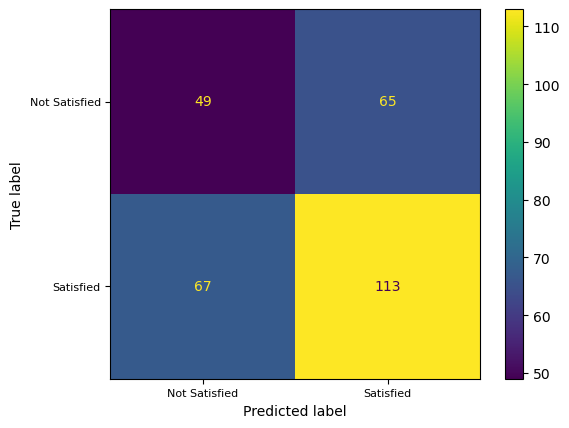

In [439]:
Over_classifier = classifier.fit(X_over, y_over)
acc_report(X_test, y_test, Over_classifier)

When model trained with resampled data, False negatives increased means employees who are satisfied but model showing not satisfied. (with resample: 73)

False positives decreased, means employees who are not satisfied are showig as satisfied.
(with resample: 68)

### 5.9.2 Logistic Regression Using SMOTE <a id='5.9.2_Logistic_Regression_Using_SMOTE'></a>


/Users/loveleen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/loveleen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Accuracy on test data: 0.59
----------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.41      0.11      0.18       114
           1       0.61      0.89      0.73       180

    accuracy                           0.59       294
   macro avg       0.51      0.50      0.45       294
weighted avg       0.53      0.59      0.52       294



/Users/loveleen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/loveleen/anaconda3/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


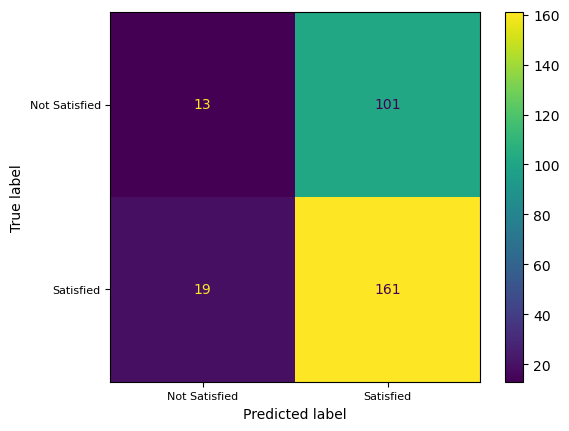

In [428]:
Smote_classifier = classifier.fit(X_smote, y_smote)
acc_report(X_test, y_test, Smote_classifier)

### 5.9.3 Logistic Regression Using ADASYN <a id='5.9.3_Logistic_Regression_Using_ADASYN'></a>

/Users/loveleen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/loveleen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/loveleen/anaconda3/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/loveleen/anaconda3/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Accuracy on test data: 0.60
----------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.44      0.12      0.19       114
           1       0.62      0.90      0.73       180

    accuracy                           0.60       294
   macro avg       0.53      0.51      0.46       294
weighted avg       0.55      0.60      0.52       294



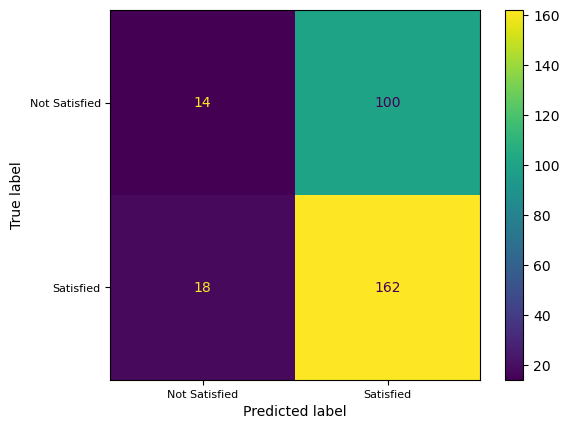

In [429]:
ADASYN_classifier = classifier.fit(X_ada, y_ada)
acc_report(X_test, y_test, ADASYN_classifier)

### 5.9.4 Logistic Regression Using Under Sampling KNN <a id='5.9.4_Logistic_Regression_Using_Under_Sampling_KNN'></a>

Accuracy on test data: 0.43
----------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.40      0.93      0.56       114
           1       0.72      0.12      0.20       180

    accuracy                           0.43       294
   macro avg       0.56      0.52      0.38       294
weighted avg       0.60      0.43      0.34       294



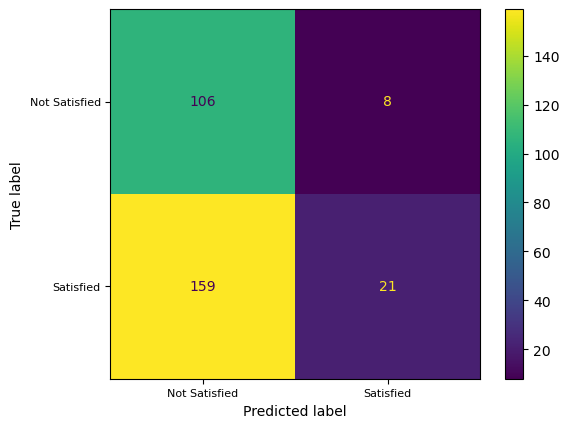

In [430]:
KNN_classifier = classifier.fit(X_en, y_en)
acc_report(X_test, y_test, KNN_classifier)

### 5.9.5 Logistic Regression Using Under Random Sampler <a id='5.9.5_Logistic_Regression_Using_Under_Random_Sampler'></a>

Accuracy on test data: 0.52
----------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.41      0.51      0.45       114
           1       0.63      0.53      0.58       180

    accuracy                           0.52       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.55      0.52      0.53       294



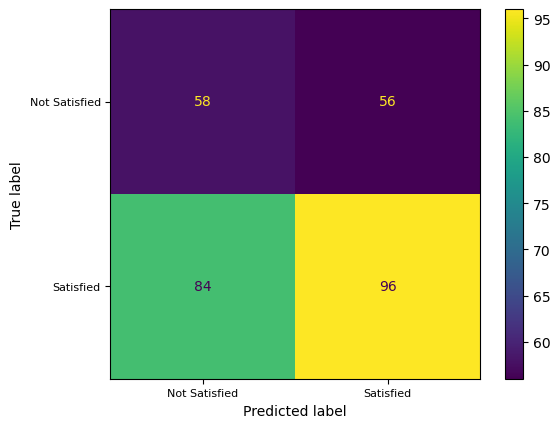

In [441]:
Random_classifier = classifier.fit(X_under, y_under)
acc_report(X_test, y_test, Random_classifier)

## 5.10 XGBoost <a id='5.10_XGBoost'></a>

In [432]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)


### 5.10.1 XGBoost Using Over Sampling <a id='5.10.1_XGBoost_Using_Over_Sampling'></a>


Accuracy on test data: 0.55
----------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.39      0.28      0.32       114
           1       0.61      0.72      0.66       180

    accuracy                           0.55       294
   macro avg       0.50      0.50      0.49       294
weighted avg       0.52      0.55      0.53       294



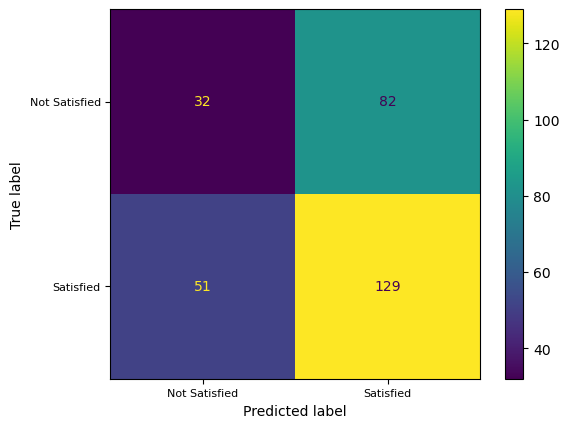

In [440]:
Over_xgb = xgb_model.fit(X_over, y_over)
acc_report(X_test, y_test, Over_xgb)

### 5.10.2 XGBoost Using SMOTE <a id='5.10.2_XGBoost_Using_SMOTE'></a>


Accuracy on test data: 0.57
----------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.42      0.28      0.34       114
           1       0.62      0.75      0.68       180

    accuracy                           0.57       294
   macro avg       0.52      0.52      0.51       294
weighted avg       0.54      0.57      0.55       294



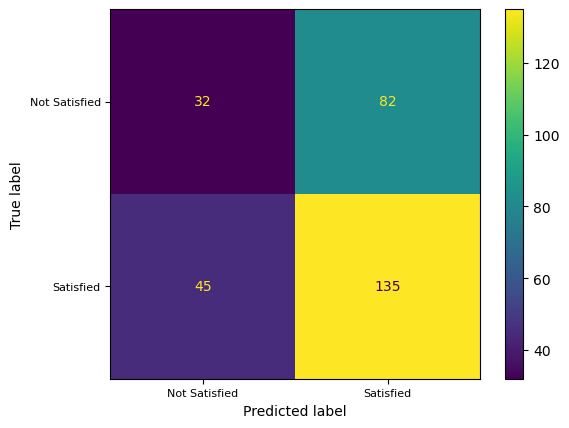

In [434]:
Smote_xgb = xgb_model.fit(X_smote, y_smote)
acc_report(X_test, y_test, Smote_xgb)

### 5.10.3 XGBoost Using ADASYN <a id='5.10.3_XGBoost_Using_ADASYN'></a>

Accuracy on test data: 0.59
----------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.46      0.30      0.36       114
           1       0.64      0.78      0.70       180

    accuracy                           0.59       294
   macro avg       0.55      0.54      0.53       294
weighted avg       0.57      0.59      0.57       294



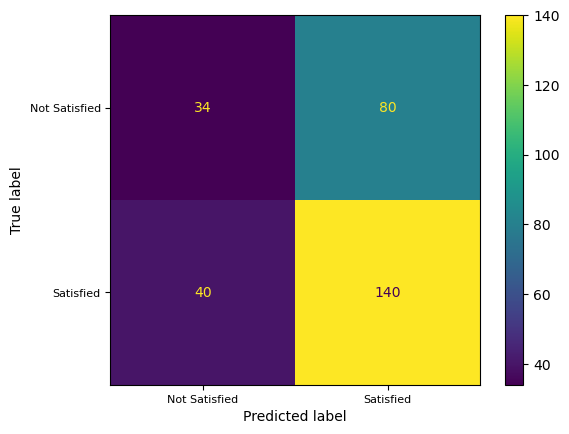

In [435]:
ADASYN_xgb = xgb_model.fit(X_ada, y_ada)
acc_report(X_test, y_test, ADASYN_xgb)

### 5.10.4 XGBoost Using Under Sampling KNN <a id='5.10.4_XGBoost_Using_Under_Sampling_KNN'></a>

Accuracy on test data: 0.45
----------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.40      0.86      0.55       114
           1       0.67      0.18      0.29       180

    accuracy                           0.45       294
   macro avg       0.54      0.52      0.42       294
weighted avg       0.57      0.45      0.39       294



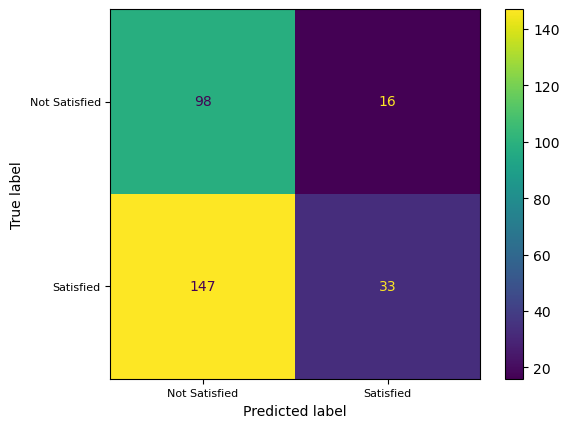

In [436]:
KNN_xgb = xgb_model.fit(X_en, y_en)
acc_report(X_test, y_test, KNN_xgb)

### 5.10.5 XGBoost Using Under Random Sampler <a id='5.10.5_XGBoost_Using_Under_Random_Sampler'></a>

Accuracy on test data: 0.50
----------------------------------
Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.39      0.50      0.44       114
           1       0.61      0.49      0.55       180

    accuracy                           0.50       294
   macro avg       0.50      0.50      0.49       294
weighted avg       0.52      0.50      0.50       294



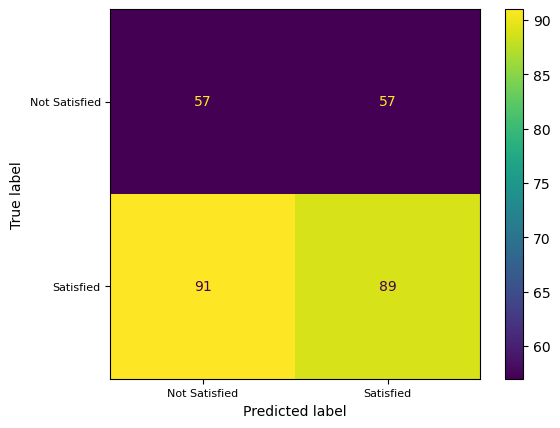

In [437]:
Random_xgb = xgb_model.fit(X_under, y_under)
acc_report(X_test, y_test, Random_xgb)

## 5.11 Save Model <a id='5.11_Save_Model'></a>


In [445]:
#This may not be "production grade ML deployment" practice, but adding some basic
#information to your saved models can save your bacon in development.
#Just what version model have you just loaded to reuse? What version of `sklearn`
#created it? When did you make it?
#Assign the pandas version number (`pd.__version__`) to the `pandas_version` attribute,
#the numpy version (`np.__version__`) to the `numpy_version` attribute,
#the sklearn version (`sklearn_version`) to the `sklearn_version` attribute,
#and the current datetime (`datetime.datetime.now()`) to the `build_datetime` attribute
#Let's call this model version '2.0'
best_model = Random_classifier
best_model.version = '2.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [446]:
# save the model

modelpath = '../models'
save_file(best_model, 'HR_Analytics_Random_classifier.pkl', modelpath)

Writing file.  "../models/HR_Analytics_Random_classifier.pkl"


## 5.12 Summary <a id='5.11_Summary'></a>


In this notebook, I used dataset from pre-processing with job statisfaction column values 0 and 1 and explored more with classification models using 80/20 train test split. 
In dataset 0 values are 39% and 1 values are 61%, it is a imbalanced dataset. To create unbaised model results, I resampled training data.
First performed train test split with stratification, so that percantage of both 0 and 1 are same in X_train, X_test, y_train, y_test. 
Then resampled training data using different techniques - Over sampling, SMOTE over sampling, ADASYN over sampling, KNN under sampling and random under sampling.
Then created logistic regression and XGBoost classification models using resampled data.
Main goal was to increase recall, which was very low without resampling.
Out of all the models, Logistic regression with random under sampling and XGBoost with over sampling showed better results. Recal score for 0 is 0.51 and 0.50 respectively. 
Logistic regression with random under sampling model has more accuracy score (0.52) with highest recall score. It shows good balace of false positives and false nagatives.
These models results will be discussed with client, accordingly decide which model to use for future predictions.


Summary of all models:

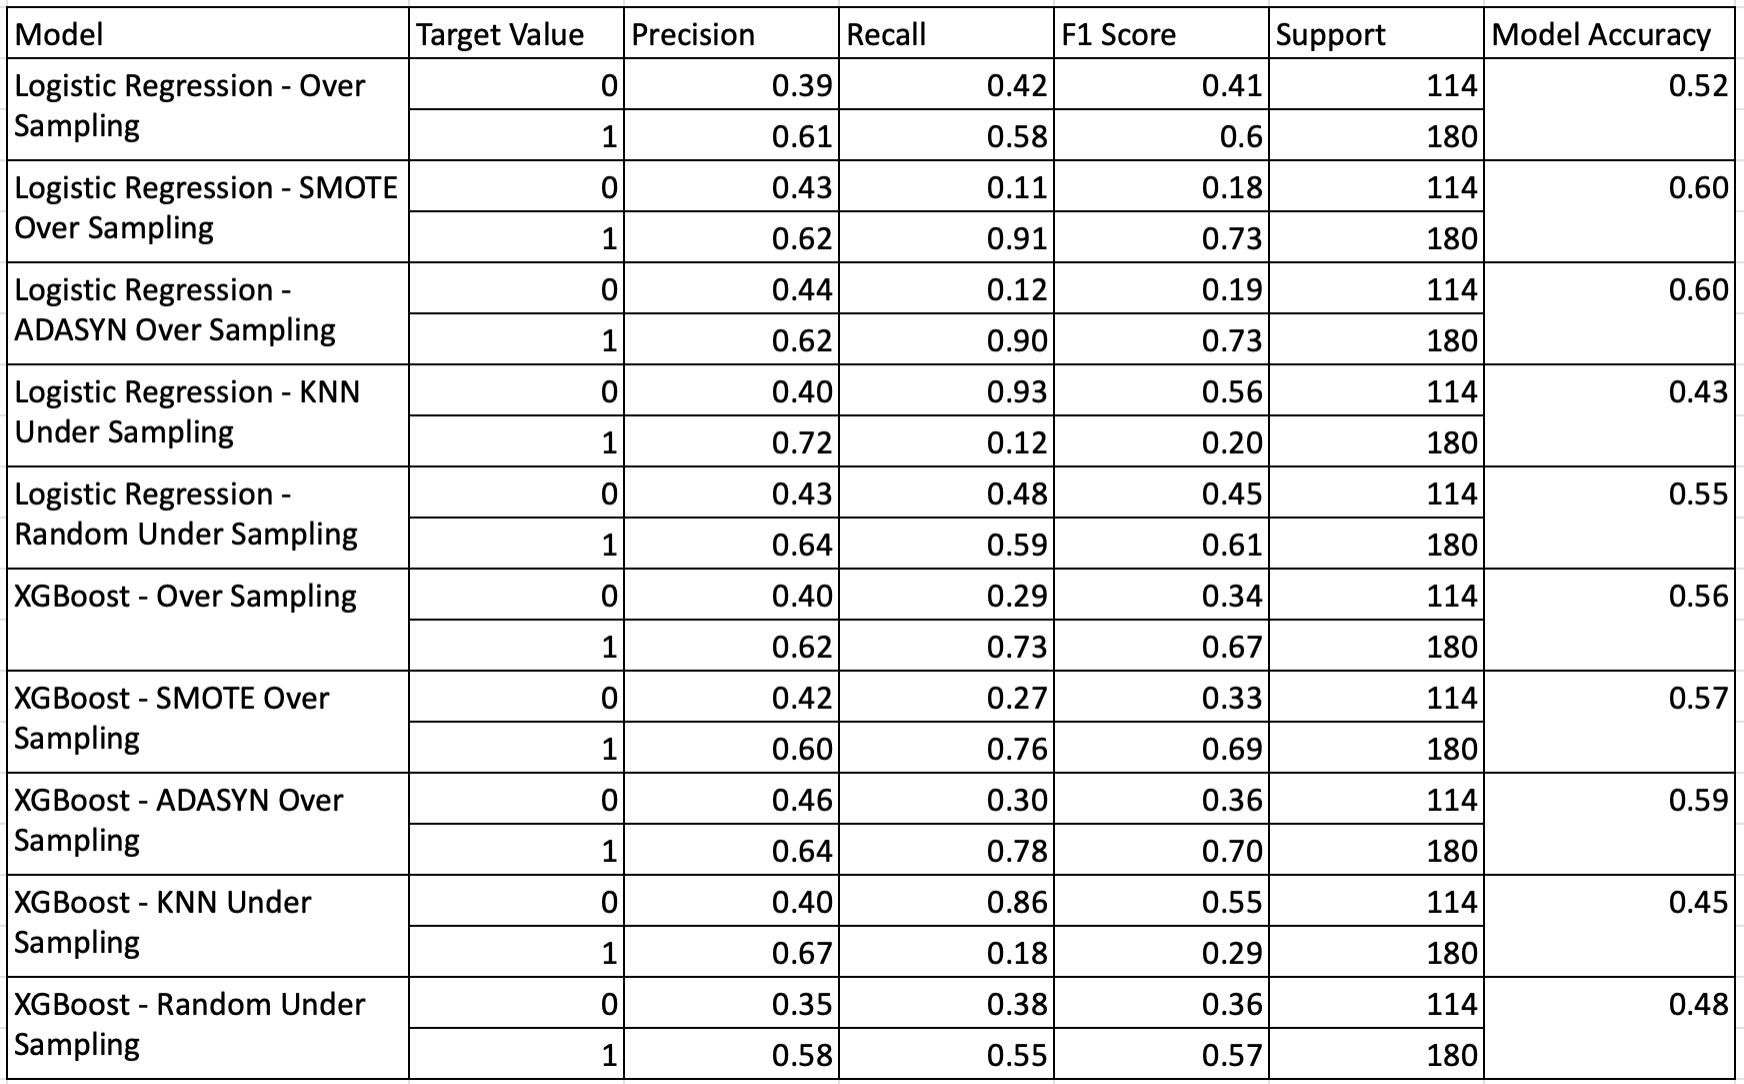